<img src="http://www.exalumnos.usm.cl/wp-content/uploads/2015/06/ISOTIPO-Color.jpg" title="Title text" width="20%" />

<hr style="height:2px;border:none"/>
<H1 align='center'> Challenge Kaggle </H1>
<H5 align='center'> Detección de posiciones de Yoga: EDA</H5>



<H3> INF-395 Redes Neuronales y Deep Learning </H3>
<H3> Autor: Francisco Andrades</H3>

Lenguaje: Python

Temas:

    - Arquitecturas de Redes Convolucionales.
    - Entrenamiento de Redes Convolucionales.
    - Regularización.
    - Tasas adaptivas, Batchnormalization.
    - Problemas Especiales.


Link Competencia: https://www.kaggle.com/c/deteccin-de-posiciones-de-yoga/

Equipo: Bios
<hr style="height:2px;border:none"/>

## Contexto
Queremos predecir el tipo de movimiento de yoga dada una imagen. Cada movimiento de yoga se puede clasificar en dos jerarquías.

## Dataset
El dataset de entrenamiento incluye 1328 imágenes de poses de yoga descargadas de la web usando el motor de búsqueda de Bing, donde cada imagen de entrenamiento, tiene dos clasificaciones (super clase y subclase, separadas por un espacio). El test set incluye 390 imágenes.
La primera (super clase), puede tomar 6 valores: 0-Standing, 1-Sitting, 2-Balanced, 3-Inverted, 4-Reclining, 5-Wheel. La segunda (subclase), puede tomar 20 diferentes valores: 6-straight, 7-forward bend, 8-side bend, 9-other1, 10-normal1, 11-normal2, 12-split, 13-forward bend, 14-twist, 15-front, 16-side, 17-legs1, 18-legs2, 19-up-facing1, 20-down-facing1, 21-side facing, 22-plank balance, 23-up-facing2, 24-down-facing2, 25-other2.

**La métrica de evaluación para esta competencia es Macro F1-Score** 

## Análisis Exploratorio de Datos

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
import cv2
np.random.seed(3)
path = '../input/deteccin-de-posiciones-de-yoga/Yoga-Dataset/Yoga-Dataset/'

clases = ["Standing", "Sitting", "Balanced", "Inverted", "Reclining", "Wheel" ,"Straight",
          "Forward Bend", "Side Bend", "Other 1", "Normal 1", "Normal 2", "Split", 
          "Forward Bend", "Twist", "Front", "Side", "Legs 1", "Legs 2", "Up Facing 1", 
          "Down Facing 1", "Side Facing", "Plank Balance", "Up Facing 2", "Down Facing 2", 
          "Other 2"]
dicc_clases = dict(enumerate(clases))

df_train = pd.read_csv(path+'yoga_train.txt',header=None)
df_train.head()

,0,1
0,0.jpg,1 14
1,1.jpg,1 14
2,2.jpg,1 14
3,4.jpg,1 14
4,6.jpg,1 14


In [2]:
print("Existen {} combinaciones de clases".format(df_train[1].unique().shape[0]))
print("\nTodas las combinaciones de clases:")
display(sorted(df_train[1].unique()))

Existen 22 combinaciones de clases

Todas las combinaciones de clases:


['0 6',
 '0 7',
 '0 8',
 '0 9',
 '1 10',
 '1 11',
 '1 12',
 '1 13',
 '1 14',
 '1 23',
 '2 15',
 '2 16',
 '3 17',
 '3 18',
 '4 19',
 '4 20',
 '4 21',
 '4 22',
 '5 15',
 '5 23',
 '5 24',
 '5 25']

- Se puede apreciar que cada superclase sólo puede combinarse con un subconjunto de subclases.  
- Sólo hay 2 subclases que pueden ser combinadas con más de 1 superclase
    - Subclase 15 puede ser combinada con las superclases 2 y 5
    - Subclase 23 puede ser combinada con las superclases 1 y 5    

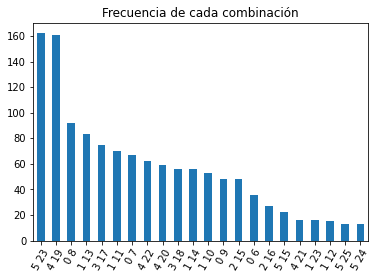

In [3]:
df_train[1].value_counts().plot(kind='bar',rot=60)
plt.title("Frecuencia de cada combinación")
plt.show()

Existe un claro problema de clases desbalanceadas.

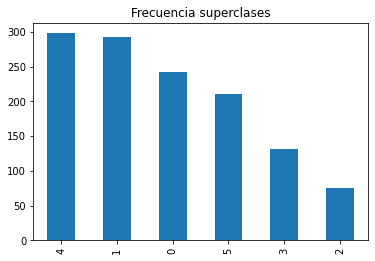

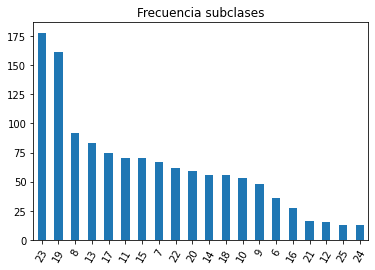

In [4]:
columnas = df_train[1].str.split(' ',expand=True)
df_train["superclases"] = columnas[0]
df_train["subclases"] = columnas[1]

df_train["superclases"].value_counts().plot(kind='bar')
plt.title("Frecuencia superclases")
plt.show()

df_train["subclases"].value_counts().plot(kind='bar',rot=60)
plt.title("Frecuencia subclases")
plt.show()

#### Desagregando por superclase

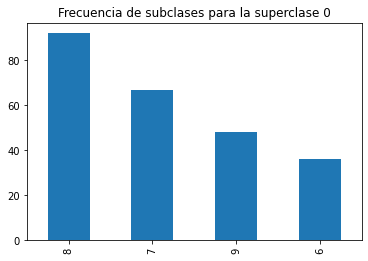

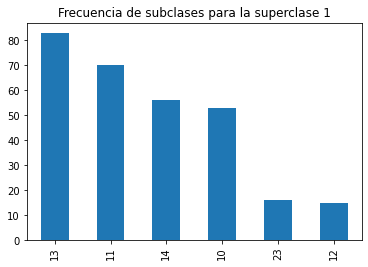

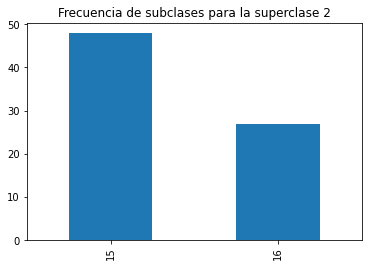

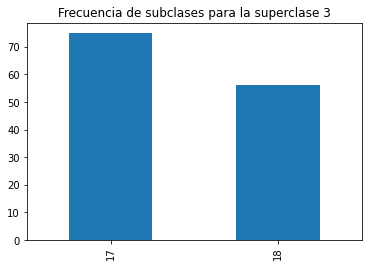

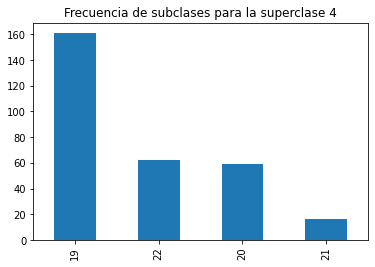

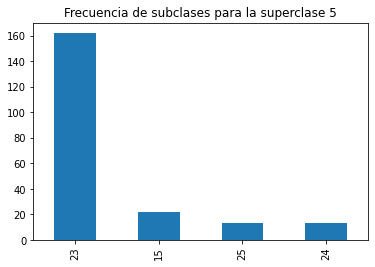

In [5]:
for superclase in range(6):
    df_aux = df_train[df_train["superclases"] == str(superclase)]
    df_aux["subclases"].value_counts().plot(kind='bar')
    plt.title("Frecuencia de subclases para la superclase "+str(superclase))
    plt.show()

#### Visualizando las clases

In [6]:
df_interes = df_train.groupby(['superclases','subclases']).apply(lambda x: x.sample(1))

def show_image(row):
    nombre_imagen = row[0]
    imagen = plt.imread(path+'Images/'+nombre_imagen)
    plt.imshow(imagen)
    plt.title(row["superclases"]+" | "+row["subclases"]+"\n"
              +dicc_clases[int(row["superclases"])]+" | "
              +dicc_clases[int(row["subclases"])])
    plt.show()
    return None

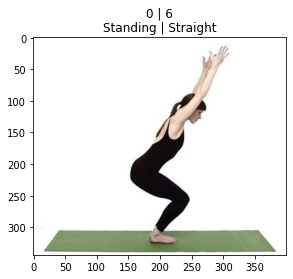

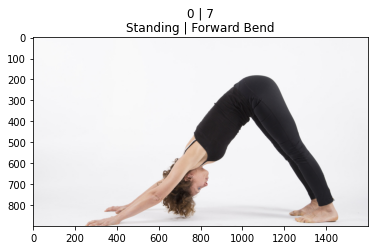

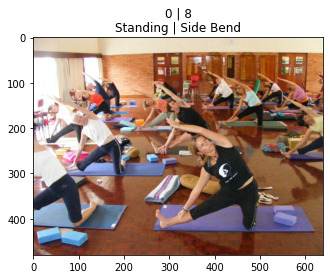

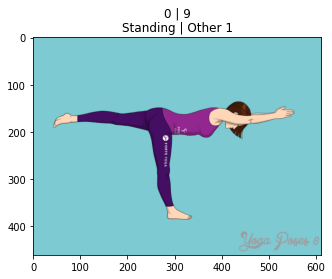

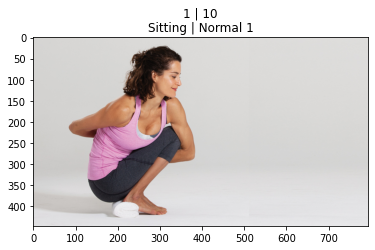

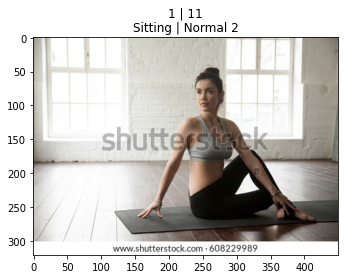

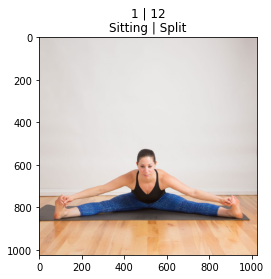

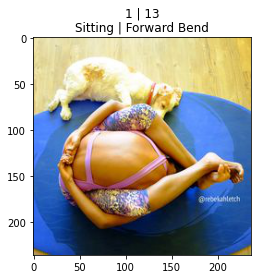

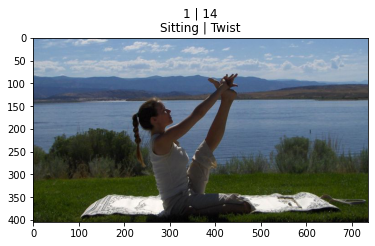

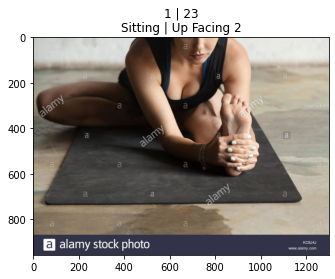

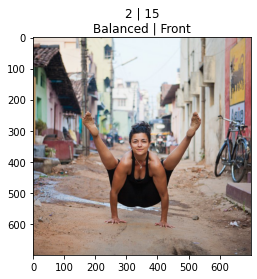

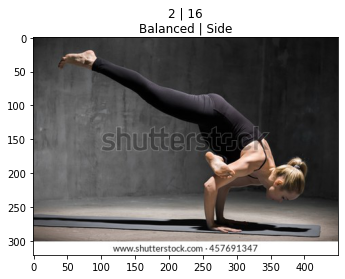

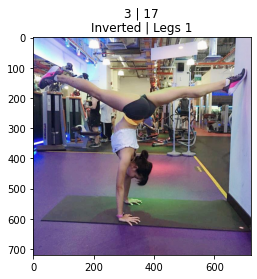

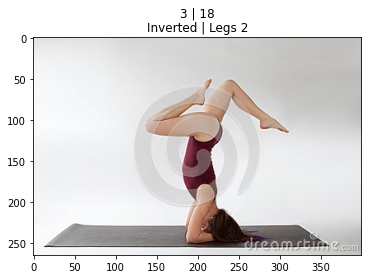

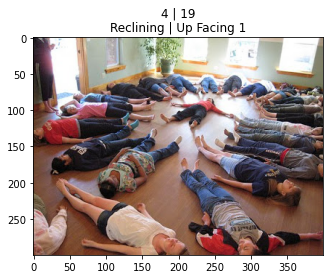

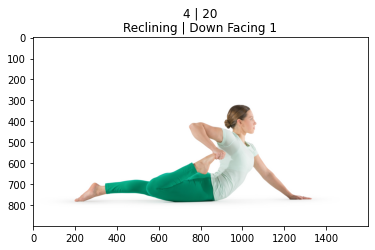

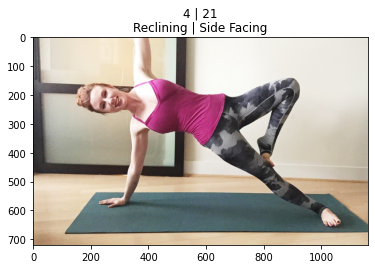

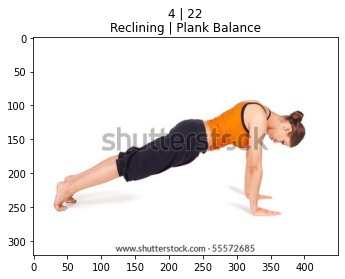

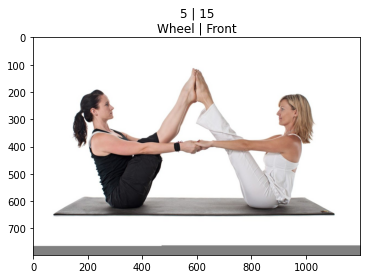

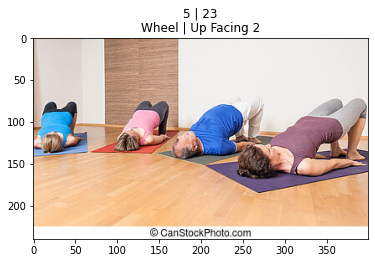

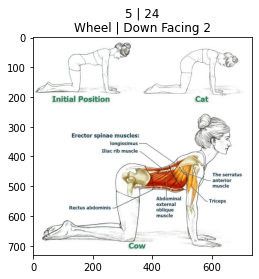

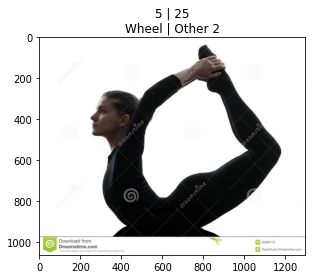

In [7]:
#df_interes
_ = df_interes.apply(show_image,axis=1)

- Existen imágenes con más de 1 persona.
- Existen imágenes con letras e íconos.
- Existen imágenes dibujadas.

Dificultad agregada: Tenemos pocos datos a disposición (sólo 1000 imágenes), el dataset original tiene 28000.

La calidad de las imágenes, la poca cantidad de datos y la gran cantidad de clases (además de un desequilibrio severo entre ellas) resultan en un problema muy complejo.

Además, considerando que la métrica que se busca optimizar es Macro F1-Score (una métrica que se ve muy afectada por el desequilibrio de clases), se debe trabajar el problema con mucho cuidado y con las medidas y herramientas pertinentes.